In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mat
import matplotlib.image as mpimg
import numpy as np

import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
from random import shuffle
import torch
from torch.utils.data import DataLoader 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from IPython.core.display import display, HTML

8000


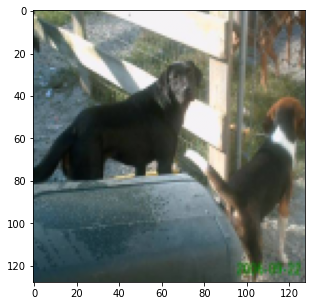

[1]


In [2]:
def show_img(open_cv_image):

    plt.figure(figsize=(5,5))
    plt.imshow(open_cv_image)
    plt.show()
class DatasetForClassify_01:
    def __init__(self,dir_name,flag):
        self.dir_name = dir_name
        self.dir_name_1 = dir_name
        self.flag = flag # 1 - показывать фотографии, 0 - не показывать
        
        
        folder_struct=self.folder2struct(dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
        
    def adddir(self,dir_name ):
        self.dir_name_1 = dir_name
        
    def reinit_0(self  ):
        
        folder_struct=self.folder2struct(self.dir_name_1)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']
    def reinit_1(self  ):
        
        folder_struct=self.folder2struct(self.dir_name)
        self.folder=folder_struct['folder']
        self.w_array=folder_struct['w_array']
        self.l_=folder_struct['l_']
        self.ind_all=folder_struct['ind_all']


    def folder2struct(self,dir_name):
        folder = []
        for folder_ in os.listdir( dir_name):
            folder.append(dir_name+folder_+ '/')
        
        indexes=np.array(range(len(folder)))
        ind_all=[]
        w_array=[]
        for i in indexes:
                   
            files_i = self.photo_shuffle(str(folder[i ]))
            ind_all.append(np.array(files_i))
            w_array.append(len(files_i))
        ind_all=np.array(ind_all)
        w_array=np.array(w_array)        
        l_=sum(w_array)
        folder_struct = {'folder':folder,'w_array':w_array,'l_' : l_,'ind_all' : ind_all}
        return folder_struct

        
        
    def __len__(self):
        
         
        return min(10000,self.l_)


    #Создание списка с фото+шаффл
    def photo_shuffle(self,folder_ ):
        files = []
        for file in os.listdir(folder_   + '/'):
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".jpeg"):
                files.append(file)
        shuffle(files)
        #print(self.folder[number])
        return files
    def downscale_2(self,img):
        img = img.astype(np.uint16)
        img = img[:, 0::2] + img[:, 1::2]
        img = img[0::2, :] + img[1::2, :]
        img >>= 2
        return img.astype(np.float)    
    #Ресайзинг
    def resize(self,pimage):
        stream = open(pimage, "rb")
        bytes = bytearray(stream.read())
        numpyarray = np.asarray(bytes, dtype=np.uint8)
        image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
        stream.close()
         
        bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB ) 
        if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :
             
            resize_image = self.downscale_2(bw_)
            #resize_image =  bw_ 
        else:
            resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)
         
         
        return resize_image
    
    def random_sample_file(self ):
        i_folder=random.sample(range(len(self.folder)), 1)
        #print('i_folder',i_folder[0])
        i_file=random.sample(range( self.w_array[i_folder[0]]), 1)
        #print('i_file',i_file[0])
        #print('self.folder[i_folder[0]]',self.folder[i_folder[0]])
        file_temp=self.folder[i_folder[0]]+self.ind_all[i_folder[0]][i_file[0]]
        return i_folder,file_temp

    def __getitem__(self,idx):

        i_folder,file_temp=self.random_sample_file()
         
            
        anchor = self.resize(file_temp)
        

        return {'Anchor':anchor/255,
                 
                
               'label': np.array([i_folder[0]])}
###################################################
dataset1 =DatasetForClassify_01('dataset/training_set/',0) 
dataloader = DataLoader(dataset1, batch_size=5)
l_=dataset1.l_
print(l_)
batch=next(iter(dataloader))
Anchor=batch['Anchor'][0].numpy() 
show_img(Anchor[:,:,:])
 
label_=batch['label'][0].numpy()  
print(label_)

In [3]:
from zz.gan_struct_04a import *
#from DiffuseMap_03b import *
#№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№
class conv_simple_features_01(Layer_06):
    def __init__(self, canal_init, device = None, L1 = 0., L2 = 0.,show=0):
        super(conv_simple_features_01, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
                
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_conv_1 = Conv2d(canal_init[0],canal_init[1], kernel_size=(2,2),
                            stride=(1, 1), padding = (1, 1), padding_mode = 'zeros', bias = True)
        self.add_module('conv01', _layer_conv_1)
        
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)

          
         
        _layer_pooling_1 = MaxPool2d(kernel_size=(2, 2)) #Сжимаем канальность
        self.add_module('Pool_00', _layer_pooling_1) 
        self.add_module('fltn_1', Flatten( )) #Делаем один выходной канал

        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, scatch0):
         
        im_01_dwnsmpl=self.conv01(scatch0)
        im_01_dwnsmpl=self.Pool_00(im_01_dwnsmpl) 
        im_01_dwnsmpl=self.activation_LeakyReLU(im_01_dwnsmpl)
        if self.show:
            print('im_01_dwnsmpl',im_01_dwnsmpl.shape)    
        vect_00=self.fltn_1(im_01_dwnsmpl)
        if self.show:
            print('vect_00',vect_00.shape)   
        return vect_00
#№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№№
class conv_simple_features_02(Layer_06):
    def __init__(self, canal_init, device = None, L1 = 0., L2 = 0.,show=0):
        super(conv_simple_features_02, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
                
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_conv_21 = Conv2d(canal_init[0],canal_init[1], kernel_size=(2,2),
                            stride=(4, 4), padding = (2, 2), padding_mode = 'zeros', bias = True)
        self.add_module('conv00', _layer_conv_21)
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_conv_22 = Conv2d(canal_init[1],canal_init[2], kernel_size=(2,2),
                    stride=(1, 1), padding = (1, 1), padding_mode = 'zeros', bias = True)
        self.add_module('conv01', _layer_conv_22)
        
          
        _layer_pooling_1 = MaxPool2d(kernel_size=(2, 2))  
        self.add_module('Pool_00', _layer_pooling_1) 
        self.add_module('fltn_1', Flatten( ))

        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, scatch0):
        im_01_dwnsmpl=self.conv00(scatch0)
        im_01_dwnsmpl=self.activation_LeakyReLU(im_01_dwnsmpl)
        if self.show:
            print('im_01_dwnsmpl',im_01_dwnsmpl.shape)    
        im_03_dwnsmpl=self.conv01(im_01_dwnsmpl)   
        im_03_dwnsmpl=self.Pool_00(im_03_dwnsmpl) 
        im_03_dwnsmpl=self.activation_LeakyReLU(im_03_dwnsmpl)
        if self.show:
            print('im_02_dwnsmpl',im_03_dwnsmpl.shape)    
        vect_00=self.fltn_1(im_03_dwnsmpl)
        if self.show:
            print('vect_00',vect_00.shape)   
        return vect_00
################################################3
class fully_connect_modul_300(Layer_06):
    def __init__(self,  size_,device = None, L1 = 0., L2 = 0.,   show=0):
        super(fully_connect_modul_300, self).__init__()
        self.show = show
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")
             
        self.L1=L1
        self.L2=L2
        self.regularizer = Regularizer(L1, L2)
        _layer_activation_1 = LeakyReLU(0.05) 
        self.add_module('activation_LeakyReLU', _layer_activation_1)
        _layer_D01 = Linear(size_[0], size_[1], bias = True)
        self.add_module('D01', _layer_D01)
        _layer_Dropout01 = Dropout(0.5)
        _layer_batch_norm_3 = BatchNorm1d(size_[1])
        self.add_module('Dropout01', _layer_Dropout01) 
        self.add_module('layer_batch_norm',  _layer_batch_norm_3) 
        _layer_D02 = Linear(size_[1], size_[2], bias = True)
        self.add_module('D02', _layer_D02)
        _layer_D03 = Linear(size_[2], size_[3], bias = True)
        self.add_module('D03', _layer_D03)
       
        
        
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
        #########################
        self.to(self.device)
        self.reset_parameters()
 
    def forward(self, vect_00):
        vect_01=self.D01(vect_00)        
        vect_01=self.Dropout01(vect_01)
        vect_01=self.activation_LeakyReLU(vect_01)
        if self.show:
            print('vect_01',vect_01.shape) 
        vect_01=self.layer_batch_norm(vect_01)
        if self.show:
            print('vect_01 layer_batch_norm',vect_01.shape) 
        vect_02=self.D02(vect_01) 
        vect_02=self.activation_LeakyReLU(vect_02)
        if self.show:
            print('vect_02',vect_02.shape)    
        vect_03=self.D03(vect_02) 
        
         
        if self.show:
            print('vect_03',vect_03.shape)         
        return vect_03

################################################3
class Normalization(nn.Module):
    def __init__(self,  device):
        super(Normalization, self).__init__()
        self.device =device
        cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]) 
        cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]) 
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.FloatTensor(cnn_normalization_mean).view(-1, 1, 1).to(self.device)
        #self.mean = torch.tensor(mean)
        #print(self.mean)
        #self.std = torch.tensor(std).view(-1, 1, 1) 
        self.std = torch.FloatTensor(cnn_normalization_std).view(-1, 1, 1).to(self.device)
        #print(self.std)
 
    def forward(self, img):
        #Получает на вход фотографию. На выходе такой же формат+размер, но другие данные. Также увеличивает канальность с 1 до 3
        return ((img - self.mean) / self.std).to(self.device)
###########################################################################################3
class TL_003_mehanit_onnx(Layer_06):
    def __init__(self, imageSize,  last_activate, L1 = 0., L2 = 0.,device = None,numclasses=10,show=0 ):
        super(TL_003_mehanit_onnx, self).__init__( (imageSize[0],imageSize[1],1)   )    

        #self.class_name = str(self.__class__).split(".")[-1].split("'")[0]
        self.class_name = self.__class__.__name__
        self.last_activate = last_activate
        self.cannal_in= imageSize[2]
         
        self.imageSize = imageSize
        self.regularizer = Regularizer(L1, L2)
        self.show=show
        self.L1=L1
        self.L2=L2
        self.numclasses=numclasses 
        self.criterion_tml = torch.nn.TripletMarginLoss(margin=1.0, p=2)
        if (device is not None):
            self.device = device if (not isinstance(device, str)) else torch.device(device)
        else:
            self.device = device if (device is not None) else \
                    torch.device("cuda" if torch.cuda.is_available() else "cpu")

        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        ##############
        self._layer_permut_channelfirst = Lambda(lambda x:  x.permute((0, 3, 1, 2)))
        self._layer_permut_channellast = Lambda(lambda x:  x.permute((0, 2, 3, 1)))
        
        self.normalization_mobilenet_v3_large = Normalization(self.device) #Первое делаем нормализиацию.
        mobilenet_v3_large = torchvision.models.mobilenet_v3_large(pretrained=0)##конв часть+ векторизация
        mobilenet_v3_large.load_state_dict(torch.load('mobilenet_v3_large-8738ca79.pth', map_location=self.device))
        self.mobilenet_v3_large= mobilenet_v3_large.features.to(self.device)# только  конв часть
        for param in self.mobilenet_v3_large.parameters():
            param.requires_grad = False
        self.conv2Dfeatures_00=conv_simple_features_01([160,128],device,L1 ,L2,self.show) 
        self.conv2Dfeatures_01=conv_simple_features_02([112,80,64],device,L1 ,L2,self.show) 
        self.conv2Dfeatures_02=conv_simple_features_02([80,64,32],device,L1 ,L2,self.show) 
        self.conv2Dfeatures_03=conv_simple_features_02([112,80,64],device,L1 ,L2,self.show) 
        self.fully_connect_modul_00=fully_connect_modul_300([512,128,64,32],device,L1 ,L2,self.show)
        self.fully_connect_modul_01=fully_connect_modul_300([384,128,64,32],device,L1 ,L2,self.show)
        self.fully_connect_modul_02=fully_connect_modul_300([320,120,32,1],device,L1 ,L2,self.show)
        
        ###################
         
        
        _layer_SfTMax = Softmax(dim = -1)
        self.add_module('SfTMax', _layer_SfTMax)  
        _layer_Sgmd = Sigmoid()
        self.add_module('Sgmd', _layer_Sgmd)  
 
        self.to(self.device)
        
        self.reset_parameters()
    #####################################################
    def forward(self, scatch ):
        class _type_input(Enum):
            is_torch_tensor = 0
            is_numpy = 1
            is_list = 2
        
           
        x_input = scatch
        
        _t_input = []
        _x_input = []
        for x in (x_input,x_input):
            if isinstance(x, (torch.Tensor)):
                _t_input.append(_type_input.is_torch_tensor)
                _x_input.append(x)
            elif isinstance(x, (np.ndarray)):
                _t_input.append(_type_input.is_numpy)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            elif isinstance(x, (list, tuple)):
                _t_input.append(_type_input.is_list)
                _x_input.append(torch.FloatTensor(x).to(self.device))
            else:
                raise Exception('Invalid type input')

        _x_input = tuple(_x_input)
        _t_input = tuple(_t_input)
        #print('_x_input[0]',_x_input[0])
        
        #ПредПроцессинг
        scatch = self._contiguous(_x_input[0]) 
        dec_0=self.predprocessing(scatch) 

        if self.show:
            print('dec_0=self.predprocessing(scatch)',dec_0.shape)
        
        ##### STYLE  ###################################### ТЕКСТУРА
        dec_1=self.get_features(dec_0) 
        #########################
        d_0=dec_1['InvertedResidual_6_1'] 
        if self.show:
            print('d_0=dec_1[InvertedResidual_6_1]',d_0.shape)
        d_01=self.conv2Dfeatures_00(d_0) 
        if self.show:
            print('d_01=self.conv2Dfeatures_00(d_0)',d_01.shape)
        d_02=self.fully_connect_modul_00(d_01) 
        if self.show:
            print('d_02=self.fully_connect_modul_00(d_01)',d_02.shape)
        ##############
        d_1=dec_1['InvertedResidual_4_1']
        if self.show:
            print('d_1=dec_1[InvertedResidual_4_1]',d_1.shape)
        d_11=self.conv2Dfeatures_01(d_1)
        if self.show:
            print('d_11=self.conv2Dfeatures_01(d_0)',d_11.shape)
        #№№№№№№№№№№№№№№№№№№    
        #Берем 3 слой из словаря. Делаем конвалюции.
        d_2=dec_1['InvertedResidual_3_1']
        if self.show:
            print('d_2=dec_1[InvertedResidual_3_1]',d_2.shape)
        d_21=self.conv2Dfeatures_02(d_2)
        if self.show:
            print('d_21=self.conv2Dfeatures_01(d_0)',d_21.shape)
        #№№№№№№№№№№№№№№№№№№ 
        d_30=torch.cat((d_11 ,d_21   ),axis=1)
        if self.show:
            print('d_30=torch.cat((d_11 ,d_21   ),axis=1)',d_30.shape)
        d_31=self.fully_connect_modul_01(d_30)
        if self.show:
            print('d_31=self.fully_connect_modul_01(d_30)',d_31.shape)
        #########################
        #Тут мы складываем тензор из первой части и тензор из 2 и 3 части. ВЫХОДНАЯ ТЕКСТУРА
        d_40_style_vector=torch.cat((d_02 ,d_31  ),axis=1)
        if self.show:
            print('d_40_style_vector',d_40_style_vector.shape)
        ##### content  ######################################
        d_5=dec_1['InvertedResidual_5_2']
        if self.show:
            print('d_5=dec_1[InvertedResidual_5_2]',d_5.shape)
        d_51_structure_vector=self.conv2Dfeatures_03(d_5)
        if self.show:
            print('d_51_structure_vector',d_51_structure_vector.shape)  
        ##########  final  ################################3
        #Складываем вектора КОНТЕНТА и ТЕКСТУРЫ
        d_52=torch.cat((d_40_style_vector ,d_51_structure_vector  ),axis=1)
        if self.show:
            print('d_52',d_52.shape) 
        d_53=self.fully_connect_modul_02(d_52)
        d_54=self.Sgmd(d_53) 
        if self.show:
            print('d_54',d_54.shape) 
            
            
 
        x = d_54
        x = self._contiguous(x)

        ###################    

        if _type_input.is_torch_tensor in _t_input:
            pass
        elif _type_input.is_numpy in _t_input:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy()
            else:
                x = x.detach().numpy()
        else:
            if (self.device.type == "cuda"):
                x = x.cpu().detach().numpy().tolist()
            else:
                x = x.detach().numpy().tolist()

        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return x 
    
    #Вся часть связанная с ВГГ для получения на выходе словаря со слоями
    def _get_regularizer(self):
        return self.regularizer
#################################################################
    def predprocessing(self, x ):
        x_1=self._layer_permut_channelfirst(x)
        x_2=self.normalization_mobilenet_v3_large(x_1)
        return x_2
    def apply_mobilenet_v3_large_to_1_tevsor(self, x_input ):
        x_1=self.predprocessing(x_input)
        x_2=self.mobilenet_v3_large(x_1)
        return x_2
    def get_features(self,image,   layers=None):
        """ Run an image forward through a model and get the features for 
            a set of layers. Default layers are for mobilenet_v3_large matching Gatys et al (2016)
        """
        model=self.mobilenet_v3_large
        ## TODO: Complete mapping layer names of PyTorch's mobilenet_v3_large to names from the paper
        ## Need the layers for the content and style representations of an image
        if layers is None:
            layers = {'0':'InvertedResidual_1', #Не используется
                      '4': 'InvertedResidual_2', #Не используется
                      '7': 'InvertedResidual_3_1', #Текстура size [2, 80, 8, 8]
                      '11': 'InvertedResidual_4_1', #Текстура size [2, 112, 8, 8]
                      '12': 'InvertedResidual_5_2',  #Контент size [2, 112, 8, 8]
                      '14': 'InvertedResidual_6_1'} #Текстура. size [2, 160, 4, 4]

        ## -- do not need to change the code below this line -- ##
        features = {}
        x = image

        # model._modules is a dictionary holding each module in the model
        for name, layer in model._modules.items():
            #print( name)
            #print(isinstance(x, (torch.Tensor)))
            
            x = layer(x)
            if name in layers:
                features[layers[name]] = x

        return features

###################################################################################################
      
    def _get_regularizer(self):
        return self.regularizer

###################################################################
    def loss_batch_01(self,dsrmn_model, xb, yb,   opt=None):
#            def cross_entropy(pred, soft_targets):
#                return -torch.log(torch.mean(torch.sum(soft_targets * pred, 1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))
#            def l2_norm_diff(pred, soft_targets):
#                return  torch.sqrt(torch.mean(torch.sum((soft_targets - pred )**2,-1)))
            #logsoftmax = nn.LogSoftmax()
            #return torch.pow(1 - torch.mean(torch.sum(soft_targets * pred, 1)), 2)
            #return torch.mean(torch.sum(- soft_targets * torch.norm(pred, p=2,dim=1), 1))
            #return torch.mean(torch.sum(- soft_targets * logsoftmax(pred), 1))

        #print(xb[0].shape)
        pred = self(xb)
          

        if isinstance(pred, tuple):
            pred0 = pred[0]
            del pred
        else:
            pred0 = pred
        loss=0
        
        #loss_mse= self._criterion(pred0, yb) 
        #print(pred0.shape)
        #print(yb.shape)
        MSELoss=nn.MSELoss(reduction='mean') 
        #print(pred0.shape,  yb.shape)
        loss_mse= MSELoss(pred0, yb) 
         
        
        loss +=1.1*loss_mse 
       
         
        
        #loss+=  2.1*loss_mse 
        #loss = loss_func(pred0, yb)
        #loss = cross_entropy(pred, yb)

        del pred0

        #_, predicted = torch.max(pred.data, dim = 1)
        #_, ind_target = torch.max(yb, dim = 1)
        #correct = (predicted == ind_target).sum().item()
        #acc = correct / len(yb) #.size(0)

        _regularizer = self._get_regularizer()

        reg_loss = 0
        for param in self.parameters():
            reg_loss += _regularizer(param)

        loss += reg_loss

        if (opt is not None)  :
            with torch.no_grad():

                opt.zero_grad()

                loss.backward()

                opt.step()

        self.count+=1
        if self.count  %3==0:
            print("*", end='')

        loss_item = loss.item()

        del loss
        del reg_loss

        return loss_item, len(yb)#, acc

    
################################################################
    def fit_dataloader_00(self, dscrm_model,loader,   epochs = 1, validation_loader = None):
        #_criterion = nn.CrossEntropyLoss(reduction='mean')
        #_optimizer = optim.AdamW(self.parameters())
        #_optimizer = optim.Adam(self.parameters(), lr = 0.00001)#, eps=0.0)
        if (self._criterion is None): # or not isinstance(self._criterion, nn._Loss):
            raise Exception("Loss-function is not select!")

        if (self._optimizer is None) or not isinstance(self._optimizer, optim.Optimizer):
            raise Exception("Optimizer is not select!")

#        _criterion = nn.MSELoss(reduction='mean')
#        _optimizer = optim.SGD(self.parameters(), lr=0.001, momentum=0.2)


         
            
            
        history = History()
        self.count=0
        for epoch in range(epochs):
            self._optimizer.zero_grad()
            
            print("Epoch {0}/{1}".format(epoch, epochs), end='')
            
            self.train()
            ########################################3
             
            
            ### train mode ###
            print("[", end='')
            losses=[]
            nums=[]
            for s in loader:
                
 
                
                train_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['label'].numpy()).to(self.device)  
                                        )
                
                 
                 
                images_Anchor=train_ds.tensors[0] 
                 
                label_=train_ds.tensors[1]
                 
                
                
                

                losses_, nums_   =   self.loss_batch_01(dscrm_model, \
                                                   images_Anchor,\
                                                    label_,  self._optimizer)                                                                                                       


                losses.append(losses_)
                nums.append(nums_ )
                 
                
            print("]", end='')


            sum_nums = np.sum(nums)
            loss = np.sum(np.multiply(losses, nums)) / sum_nums
            ######################################
             
            ### test mode ###
            if validation_loader is not None:
                 


                self.eval()
                
                 
                print("[", end='')
                losses=[]
                nums=[]
                for s in validation_loader:
                #s = next(iter(loader))
                
                    val_ds = TensorDataset(                                                            
                                        torch.FloatTensor(s['Anchor'].numpy()).to(self.device),
                                        torch.FloatTensor(s['class_'].numpy()).to(self.device)  
 
                                        )
                

                    images_Anchor=val_ds.tensors[0] 

                    class_=val_ds.tensors[1]
                     
                
                 
                
                     
                
                

  
                      
                    
                                                                                                                         

                    losses_, nums_   =  \
                    self.loss_batch_01( dscrm_model,\
                           (images_Anchor ,images_Anchor ),\
                           class_, self._optimizer)      

                    losses.append(losses_)
                    nums.append(nums_ )
                print("]", end='')


                sum_nums = np.sum(nums)
                val_loss = np.sum(np.multiply(losses, nums)) / sum_nums
                    #acc = np.sum(np.multiply(accs, nums)) / sum_nums
                #################################################
                history.add_epoch_values(epoch, {'loss': loss, 'val_loss': val_loss})
                
                print(' - Loss: {:.6f}'.format(loss), end='')
                print(' - Test-loss: {:.6f}'.format(val_loss), end='')
            else:
                history.add_epoch_values(epoch, {'loss': loss })
                print(' - Loss: {:.6f}'.format(loss), end='')
                
            print("")
            
 
        if torch.cuda.is_available():
            torch.cuda.empty_cache()

        return history
    
    
    
    
#from DiffuseMap_03b import *
IMAGE_SIZE = [128, 128, 3] 
TL_001 = TL_003_mehanit_onnx(imageSize = IMAGE_SIZE, last_activate='linear', device='cuda',numclasses=670 ,show=1)
TL_001.compile(criterion='000', optimizer='adam', lr=0.0001, momentum=0.5) 
#TL_001.load_state('TL_01.pt')
TL_001.load_state('cat_dogs_mobileNet.pt')      
TL_001.eval()
TL_001.summary() 


Loading preset weights... Ok.
dec_0=self.predprocessing(scatch) torch.Size([2, 3, 128, 128])
d_0=dec_1[InvertedResidual_6_1] torch.Size([2, 160, 4, 4])
im_01_dwnsmpl torch.Size([2, 128, 2, 2])
vect_00 torch.Size([2, 512])
d_01=self.conv2Dfeatures_00(d_0) torch.Size([2, 512])
vect_01 torch.Size([2, 128])
vect_01 layer_batch_norm torch.Size([2, 128])
vect_02 torch.Size([2, 64])
vect_03 torch.Size([2, 32])
d_02=self.fully_connect_modul_00(d_01) torch.Size([2, 32])
d_1=dec_1[InvertedResidual_4_1] torch.Size([2, 112, 8, 8])
im_01_dwnsmpl torch.Size([2, 80, 3, 3])
im_02_dwnsmpl torch.Size([2, 64, 2, 2])
vect_00 torch.Size([2, 256])
d_11=self.conv2Dfeatures_01(d_0) torch.Size([2, 256])
d_2=dec_1[InvertedResidual_3_1] torch.Size([2, 80, 8, 8])
im_01_dwnsmpl torch.Size([2, 64, 3, 3])
im_02_dwnsmpl torch.Size([2, 32, 2, 2])
vect_00 torch.Size([2, 128])
d_21=self.conv2Dfeatures_01(d_0) torch.Size([2, 128])
d_30=torch.cat((d_11 ,d_21   ),axis=1) torch.Size([2, 384])
vect_01 torch.Size([2, 128])
v

# Обучение

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.052239
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

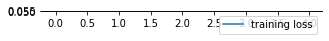

loss:   0.05271766456115415
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.049363
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

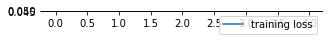

loss:   0.04728975728378373
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.045581
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

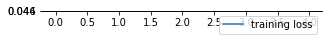

loss:   0.046473588971920915
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.039279
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

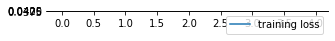

loss:   0.03705864815491026
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.039515
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

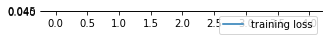

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.041876
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

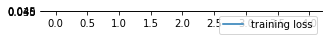

loss:   0.03533573159908442
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.037853
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

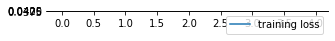

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.042445
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

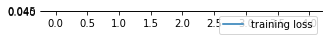

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.043416
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

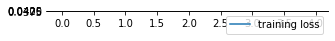

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.037837
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

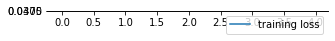

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.037567
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

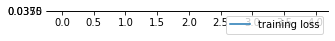

loss:   0.03468531619824283
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.033335
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

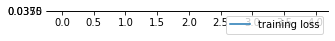

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.033527
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

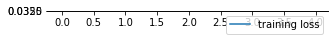

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.033500
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

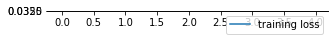

loss:   0.03260096264216833
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.039420
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

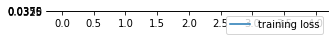

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.036231
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

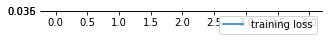

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.036001
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

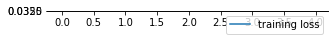

loss:   0.031137789506454697
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.034139
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

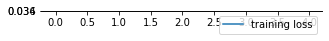

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.034202
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

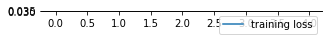

loss:   0.03027694761607279
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.029491
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

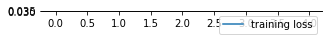

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.033251
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

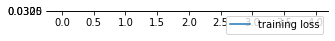

loss:   0.0286360542895574
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.031601
Epoch 1/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

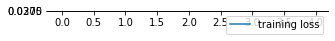

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.028372
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

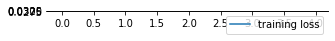

loss:   0.026064289726125685
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.032524
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

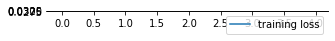

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.029373
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

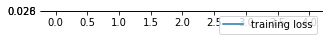

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.031041
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

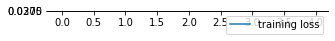

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.028522
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

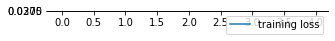

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.029794
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

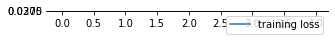

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.025751
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

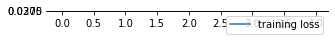

loss:   0.025313336164549425
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.028090
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

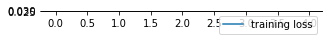

loss:   0.023115501388704118
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.024169
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

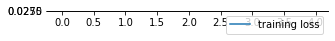

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.032762
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

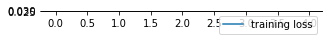

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.021620
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

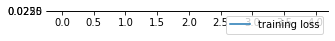

loss:   0.023083693124743187
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.022083
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

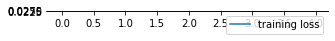

loss:   0.022528850373686453
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.024331
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

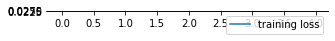

loss:   0.021601185638481013
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.023651
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

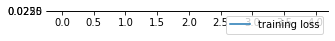

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.023184
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

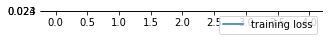

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.024500
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

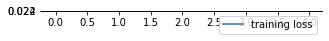

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.024727
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

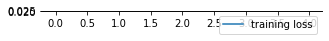

loss:   0.01917722798455475
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.022520
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

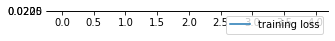

loss:   0.018105865119926044
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.018683
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

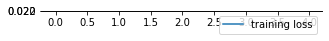

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.019817
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

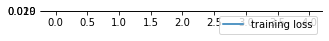

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.017071
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

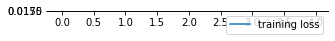

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.019776
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

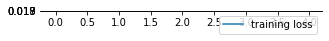

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.018215
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

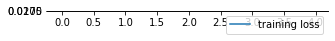

loss:   0.017667214739205673
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.014795
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

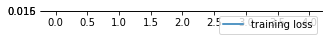

loss:   0.015634572701551434
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.015664
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

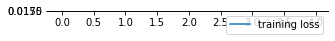

loss:   0.01478372873972426
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.015505
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

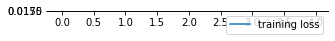

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.014577
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

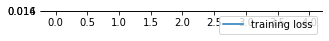

loss:   0.013055537699999259
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.015787
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

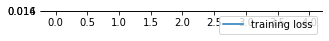

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.016134
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

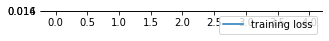

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.015066
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

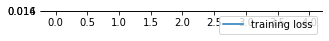

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.013657
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

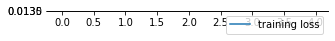

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.013839
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

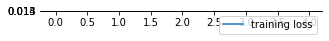

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.014434
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

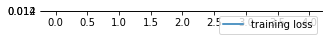

loss:   0.011175568995553909
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.011918
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

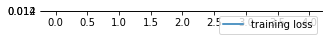

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.012327
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

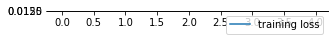

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.013106
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

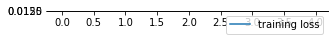

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.013606
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

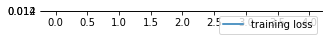

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.014825
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

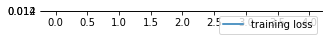

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010956
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

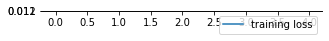

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.011924
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

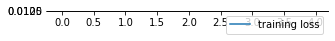

loss:   0.009538766110721306
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.012817
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

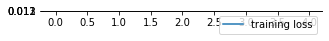

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010587
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

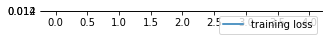

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.011679
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

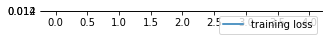

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010811
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

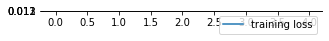

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.014700
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

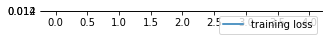

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010852
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

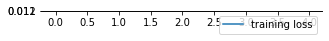

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.012258
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

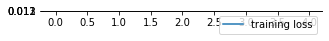

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010738
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

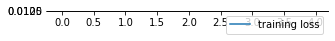

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.011200
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

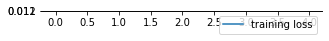

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009882
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

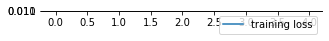

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010028
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

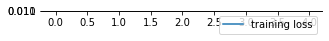

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010026
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

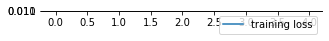

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010944
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

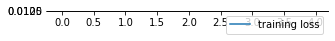

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009985
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

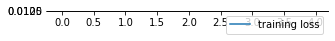

loss:   0.009309291469351874
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008585
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

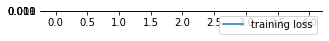

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009961
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

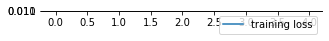

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010296
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

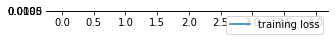

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009145
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

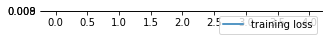

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008599
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

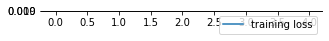

loss:   0.009254243667338029
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009116
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

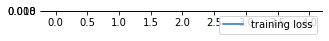

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010355
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

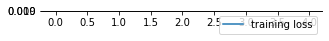

loss:   0.008654496150392444
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010173
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

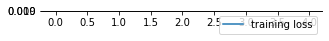

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009431
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

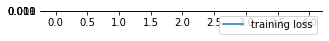

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009273
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

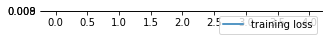

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010836
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

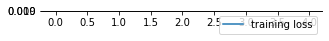

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.011369
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

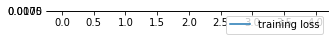

loss:   0.00837964962628799
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009344
Epoch 1/5[****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

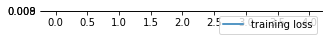

loss:   0.007895076023998929
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008036
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

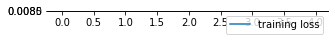

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007485
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

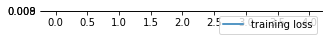

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008747
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

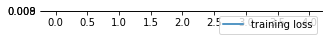

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008905
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

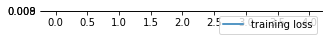

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009437
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

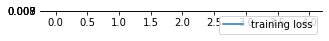

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010158
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

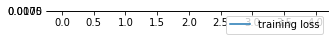

loss:   0.007513542253824782
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007548
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

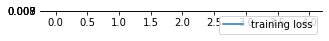

loss:   0.006893504600104053
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.012703
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

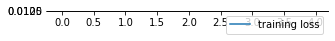

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009232
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

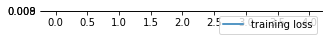

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008615
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

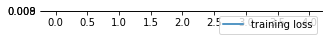

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.010149
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

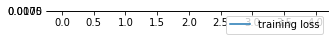

loss:   0.006792225913683481
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007677
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

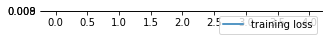

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008200
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

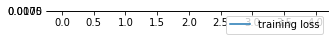

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008514
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

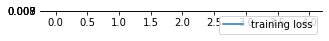

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.009026
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

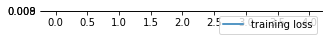

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007601
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

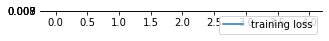

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006388
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

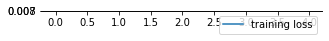

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007955
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

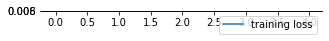

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007608
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

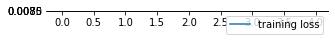

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007793
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

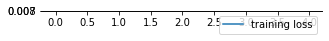

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007899
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

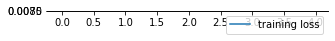

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008045
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

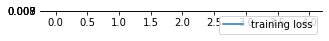

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007387
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

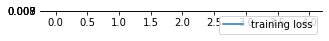

loss:   0.006615623756299613
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007539
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

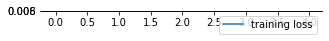

loss:   0.0056151212312612366
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008852
Epoch 1/5[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

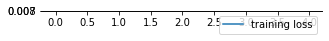

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007030
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

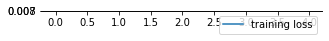

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006495
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

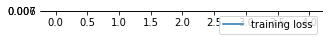

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008211
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

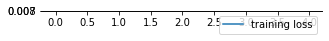

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007014
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

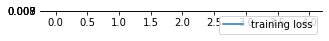

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007676
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

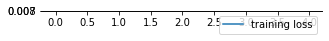

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007581
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

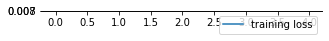

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005952
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

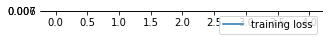

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006996
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

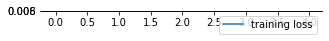

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005278
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

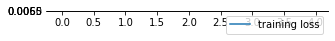

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006096
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

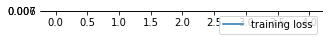

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007512
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

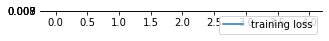

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006934
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

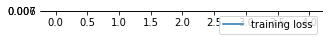

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006622
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

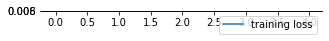

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007907
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

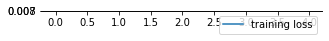

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007739
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

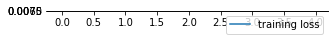

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006650
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

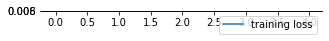

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005984
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

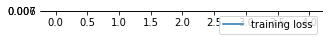

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007024
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

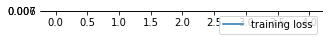

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006187
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

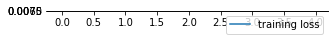

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006101
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

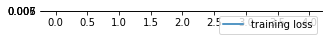

loss:   0.0049800462394566656
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.008183
Epoch 1/5[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

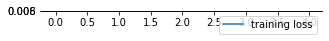

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006455
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

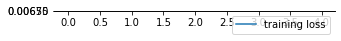

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004730
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

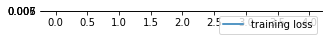

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005564
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

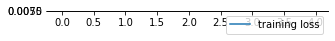

loss:   0.004478557259205598
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006414
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

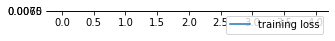

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006345
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

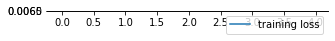

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005186
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

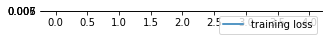

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006315
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

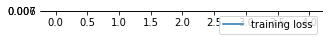

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006471
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

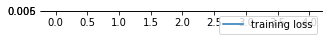

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004514
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

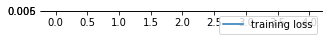

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005190
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

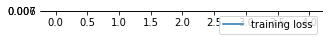

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007056
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

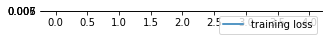

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005670
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

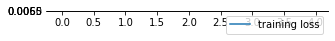

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006890
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

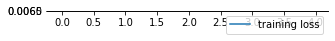

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004428
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

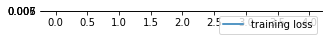

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005686
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

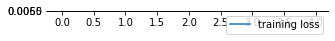

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006792
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

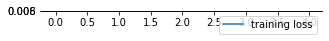

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.007924
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

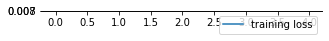

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005761
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

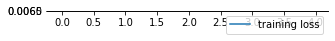

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005226
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

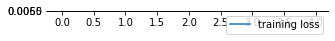

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005730
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

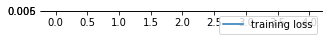

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005682
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

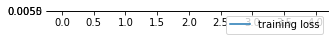

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005809
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

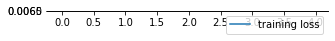

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004799
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

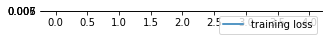

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004259
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

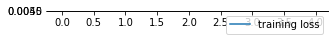

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005693
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

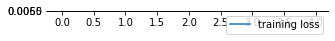

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006561
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

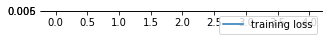

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005711
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

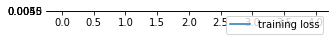

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004608
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

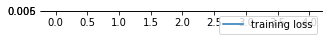

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005471
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

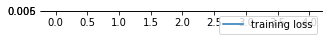

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004634
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

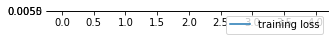

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004431
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

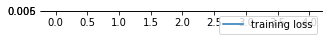

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004778
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

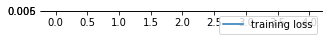

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005529
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

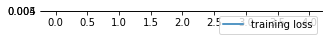

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005578
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

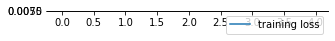

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004469
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

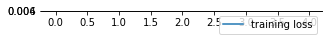

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005124
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

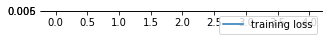

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006081
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

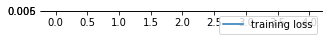

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004281
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

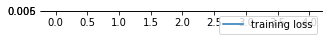

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006590
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

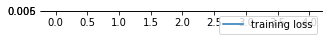

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005172
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

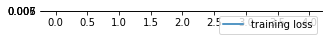

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005718
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

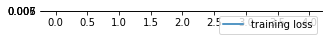

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005552
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

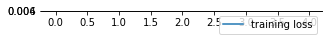

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005846
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

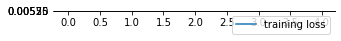

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.006421
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

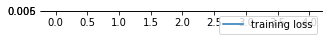

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004765
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

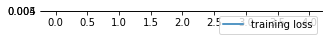

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004419
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

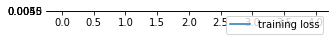

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005102
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

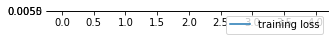

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004515
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

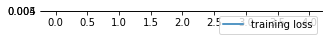

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005283
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

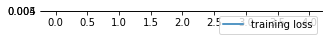

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005253
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

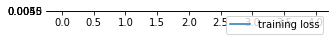

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005460
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

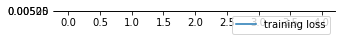

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004377
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

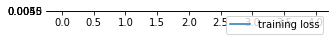

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005323
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

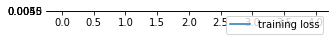

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005091
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

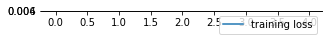

loss:   0.0031913078038136406
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004180
Epoch 1/5[**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

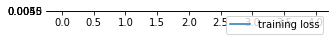

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004507
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

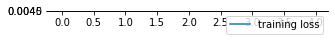

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003826
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

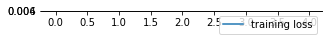

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003872
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

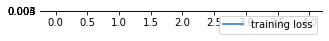

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005627
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

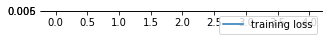

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004584
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

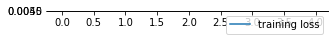

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003416
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

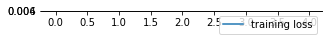

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004349
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

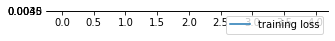

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004458
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

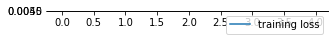

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005224
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

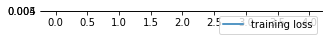

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004179
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

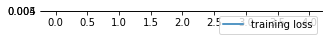

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004310
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

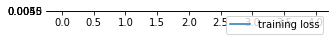

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004760
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

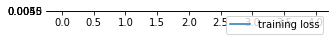

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003906
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

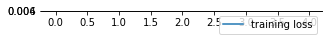

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005912
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

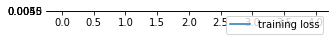

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003698
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

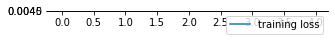

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004852
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

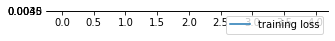

loss:   0.003115823126205376
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004510
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

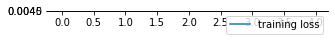

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003342
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

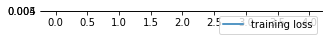

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004485
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

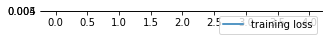

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004512
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

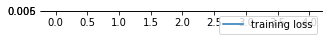

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004609
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

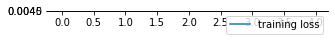

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003972
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

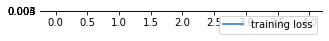

loss:   0.003099240500480035
Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003957
Epoch 1/5[***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

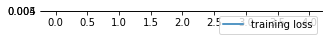

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004287
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

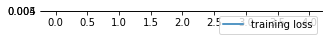

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004456
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

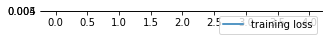

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005588
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

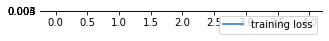

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003769
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

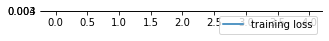

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.005197
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

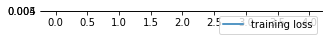

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004199
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

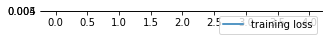

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.004513
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

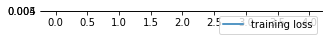

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003877
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

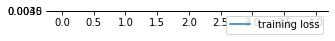

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003388
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

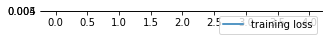

Epoch 0/5[*****************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************] - Loss: 0.003392
Epoch 1/5[********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

KeyboardInterrupt: 

In [4]:
min_loss=10


dataset1 =DatasetForClassify_01('dataset/training_set/',0) 
dataloader = DataLoader(dataset1, batch_size=5)        


for gn in range(1000):
    H =TL_001.fit_dataloader_00(  \
                None,loader=dataloader,   epochs = 5, validation_loader = None)
    plt.figure(figsize=(5,5))
    plt.axes().set_aspect('equal')
    plt.plot(H.history['loss'], label='training loss')
    #plt.plot(H.history['val_loss'], label='val loss')
    plt.legend()
    plt.show()
    loss_=H.history['loss'][-1]
    if loss_<min_loss:
        TL_001.save_state('cat_dogs_mobileNet.pt')
           
         
        print("loss:  ",loss_)
        min_loss=loss_
    dataset1 =DatasetForClassify_01('dataset/training_set/',0) 
    dataloader = DataLoader(dataset1, batch_size=5)        
     
     

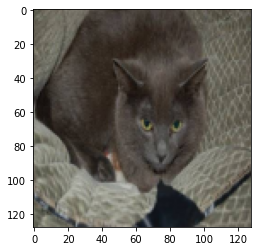

0.00027998237


'This is Cat'

In [29]:
def resize(pimage):
    stream = open(pimage, "rb")
    bytes = bytearray(stream.read())
    numpyarray = np.asarray(bytes, dtype=np.uint8)
    image = cv2.imdecode(numpyarray,cv2.IMREAD_COLOR) 
    stream.close()

    bw_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB ) 
    if( bw_.shape[0]== -256 ) and (bw_.shape[1]==256) :

        resize_image = self.downscale_2(bw_)
        #resize_image =  bw_ 
    else:
        resize_image = cv2.resize(bw_, (128,128), interpolation = cv2.INTER_AREA)


    return resize_image/255

def check_nn(path):
    files = []
    for file in os.listdir(path):
        files.append(path+file)
    shuffle(files)
    resize_image = resize(files[0])
    plt.imshow(resize_image)
    plt.show()
    value = TL_001(np.expand_dims(resize_image,0))[0][0]
    print(value)
    if value < 0.5:
        return 'This is Cat'
    else:
        return 'This is Dog'
check_nn('dataset/test_set/test/')

# Слои

In [ ]:
layers = {'0':'InvertedResidual_0', #Конвалюция(stride = 2,2) + Ускорение BatchNorm2d + Активация Hardswish. 
                                    #Выход [2, 3, 128, 128]
          '1':'InvertedResidual_1', #1 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu
                                    #2 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 16, 64, 64]
          '2':'InvertedResidual_2', #1 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu 
                                    #2 блок: Конвалюция(stride = 2,2) + Ускорение BatchNorm2d + Активация ReLu 
                                    #3 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 24, 32, 32]
          '3':'InvertedResidual_3', #1 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu 
                                    #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu 
                                    #3 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 24, 32, 32]
          '4':'InvertedResidual_4', #1 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu 
                                    #2 блок: Конвалюция + Ускорение BatchNorm2d(stride = 2,2) + Активация ReLu 
                                    #3 блок: Конвалюция + Активация ReLu + Конвалюция. SqueezeExcitation СЛОЙ
                                    #4 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 40, 16, 16]
          '5':'InvertedResidual_5', #1 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu 
                                    #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu 
                                    #3 блок: Конвалюция + Активация ReLu + Конвалюция. SqueezeExcitation СЛОЙ
                                    #4 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 40, 16, 16]
          '6':'InvertedResidual_6', #1 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu 
                                    #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация ReLu 
                                    #3 блок: Конвалюция + Активация ReLu + Конвалюция. SqueezeExcitation СЛОЙ
                                    #4 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 40, 16, 16]
          '7': 'InvertedResidual_7',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                    #2 блок: Конвалюция(stride = 2,2) + Ускорение BatchNorm2d + Активация Hardswish.
                                    #3 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 80, 8, 8]
          '8': 'InvertedResidual_8',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                    #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                    #3 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 80, 8, 8]
          '9': 'InvertedResidual_9',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                    #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                    #3 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                    #Выход [2, 80, 8, 8]
          '10': 'InvertedResidual_10',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #3 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                      #Выход [2, 80, 8, 8]
          '11': 'InvertedResidual_11',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #3 блок: Конвалюция + Активация ReLu + Конвалюция. SqueezeExcitation СЛОЙ
                                      #4 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                      #Выход [2, 112, 8, 8] 
          '12': 'InvertedResidual_12',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #3 блок: Конвалюция + Активация ReLu + Конвалюция. SqueezeExcitation СЛОЙ
                                      #4 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                      #Выход [2, 112, 8, 8] 
          '13': 'InvertedResidual_13',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #2 блок: Конвалюция(stride = 2,2) + Ускорение BatchNorm2d + Активация Hardswish.
                                      #3 блок: Конвалюция + Активация ReLu + Конвалюция. SqueezeExcitation СЛОЙ
                                      #4 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                      #Выход [2, 160, 4, 4]
          '14': 'InvertedResidual_14',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #3 блок: Конвалюция + Активация ReLu + Конвалюция. SqueezeExcitation СЛОЙ
                                      #4 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                      #Выход [2, 160, 4, 4]
          '15': 'InvertedResidual_15',#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #2 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                      #3 блок: Конвалюция + Активация ReLu + Конвалюция. SqueezeExcitation СЛОЙ
                                      #4 блок: Конвалюция + Ускорение BatchNorm2d + IDENTITY. 
                                      #Выход [2, 160, 4, 4]
          '16': 'InvertedResidual_16'#1 блок: Конвалюция + Ускорение BatchNorm2d + Активация Hardswish.
                                     #Выход [2, 960, 4, 4]
          } 